In [13]:
%matplotlib inline

import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn import preprocessing
from scipy import ndimage
import scipy
import skimage
#from medpy.filter import IntensityRangeStandardization
import time, os
import shutil, pathlib
from functools import partial
from skimage.measure import compare_ssim
from sklearn.metrics import mean_squared_error
import math
import os
import cv2

In [2]:
print(os.path.abspath(os.curdir))
os.chdir("..")
os.chdir('moj')
print(os.path.abspath(os.curdir))

/notebook/PConv-Keras
/notebook/moj


In [3]:
from pathlib import Path
p=Path("data/healthy-axis2-slice100/")
file_img = list(p.rglob('*t1w.nii.gz'))
file_mask = list(p.rglob('*brainmask.nii.gz'))
file_all = list(p.rglob('*.gz'))

In [4]:
def read_all_images():
    brain_list = []
    for skull_path, mask_path in list(zip(file_img, file_mask)): #gre skozi vse slike
        #make nparrays from images in file
        skull_sitk = sitk.ReadImage(str(skull_path), sitk.sitkFloat32)
        skull_array = sitk.GetArrayFromImage(skull_sitk)
        mask_sitk = sitk.ReadImage(str(mask_path), sitk.sitkFloat32)
        mask_array = sitk.GetArrayFromImage(mask_sitk)
        brain_array = skull_array * mask_array #mask just the brain
        brain_list.append(brain_array) #get a list of brain images
    return brain_list

In [5]:
brain_list = read_all_images()

In [6]:
print(os.path.abspath(os.curdir))
os.chdir("..")
os.chdir('PConv-Keras')
print(os.path.abspath(os.curdir))

/notebook/moj
/notebook/PConv-Keras


In [7]:
def mad(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)
    
def norm(img: np.ndarray):
    idx = np.where(img !=0)
    mu = np.median(img[idx].flatten())
    std = mad(img[idx].flatten())
    print('.', end='')
    img_tr = (img[idx] - mu) / std   
    new_img = np.array(img)
    new_img[idx] = img_tr
    return new_img

In [8]:
def change_range(image): 
    idx = np.where(image != 0)
    img_max = np.max(image[idx])
    img_min = np.min(image[idx])
    image_tr = ((image[idx] - img_min)/(img_max - img_min))
    new_image = np.array(image)
    new_image[idx] = image_tr
    return new_image

In [9]:
np.shape(brain_list)

(2487, 1, 229, 193)

In [10]:
cache = (norm(image) for image in brain_list)
brain_list = [change_range(image) for image in cache]

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [12]:
brain_resized = [scipy.misc.imresize(img[0], (512, 512)) for img in brain_list]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
i = 0

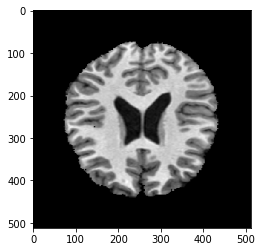

In [14]:
plt.imshow(brain_resized[i], cmap='gray')
i+=1

In [16]:
np.max(brain_resized)

255

In [17]:
print(os.path.abspath(os.curdir))

/notebook/PConv-Keras


In [18]:
np.save('data/healthy_slice100_512x512_255', brain_resized)

In [2]:
lesions = np.load('clinical-ms-slice100-lessions-Copy1.npy')

In [3]:
np.shape(lesions)

(633, 176, 144)

In [4]:
lesions_resized = [scipy.misc.imresize(img, (512, 512)) for img in lesions]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [9]:
np.max(lesions_resized[0])

255

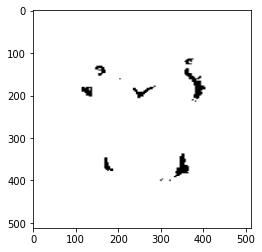

In [7]:
plt.imshow(lesions_resized[0], cmap='gray')

In [11]:
img = lesions_resized[0]

In [14]:
l = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)/255

In [15]:
np.shape(l)

(512, 512, 3)

In [16]:
lesion_rgb = [cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)/255 for image in lesions_resized]

In [17]:
np.shape(lesion_rgb)

(633, 512, 512, 3)

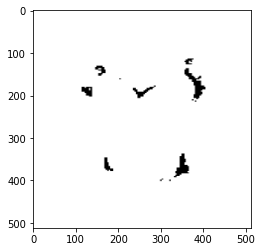

In [18]:
plt.imshow(lesion_rgb[0])

In [19]:
np.save('data/lesion_slice100_512x512_3', lesion_rgb)